# SMOTE(Synthetic Minority Oversampling Technique)

SMOTE(Synthetic Minority Oversampling Technique) is a technique used in ML to address imbalanced datasets
where the minority class has significantly fewer instances than the majority class. SMOTE involves generating
synthetic instances of the minority class by interpolating between existing instances 

In [1]:
from sklearn.datasets import make_classification

In [3]:
## Create imbalanced dataset with 1000 samples, 2 features, 1 cluster per class, and class weights to induce imbalance
X,y = make_classification(n_samples=1000,n_features=2,n_clusters_per_class=1,weights=[0.90],random_state=12,n_redundant=0)

In [4]:
import pandas as pd
df1 = pd.DataFrame(X,columns=['f1','f2'])
df2 = pd.DataFrame(y,columns=['target'])
final_df = pd.concat([df1,df2],axis=1)
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [5]:
final_df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

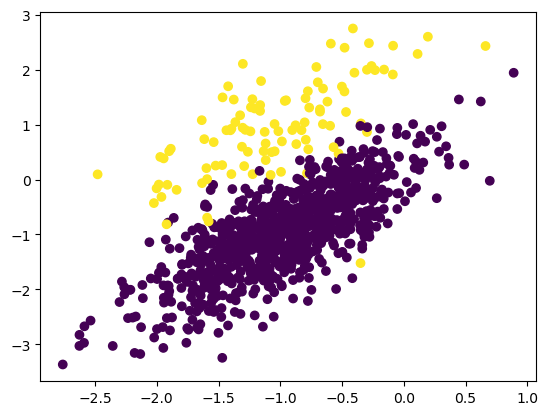

In [7]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

In [8]:
!pip install imblearn

In [11]:
from imblearn.over_sampling import SMOTE

In [12]:
oversample = SMOTE()
X,y = oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [13]:
X.shape

(1800, 2)

In [14]:
y.shape

(1800,)

In [18]:
y==0

0        True
1        True
2        True
3       False
4        True
        ...  
1795    False
1796    False
1797    False
1798    False
1799    False
Name: target, Length: 1800, dtype: bool

In [16]:
y[y==0]

0      0
1      0
2      0
4      0
5      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: target, Length: 900, dtype: int32

In [19]:
len(y[y==0])

900

In [20]:
## After doing the smote, we can see plt as 
df1 = pd.DataFrame(X,columns=['f1','f2'])
df2 = pd.DataFrame(y,columns=['target'])
oversample_df = pd.concat([df1,df2],axis=1)

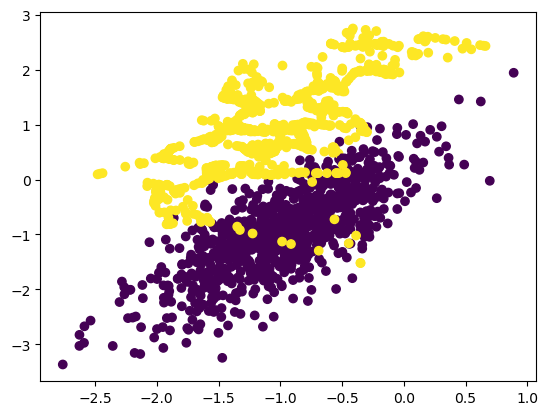

In [21]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c=oversample_df['target'])